In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_data = pd.read_csv(r'C:\Users\Vatsal\files\IBULHSGFIN.csv')
print(main_data.shape)
main_data.head()

(245, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,748.000000,755.000000,723.500000,733.349976,686.304016,7365637.0
1,2019-06-11,700.000000,714.950012,668.599976,674.549988,631.276184,35067863.0
2,2019-06-12,668.000000,669.000000,608.750000,621.049988,581.208313,36410404.0
3,2019-06-13,614.099976,698.799988,588.200012,694.299988,649.759155,48502247.0
4,2019-06-14,707.000000,708.700012,662.150024,672.250000,629.123718,29969483.0


In [3]:
df = pd.DataFrame(main_data)

In [4]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(244, 7)

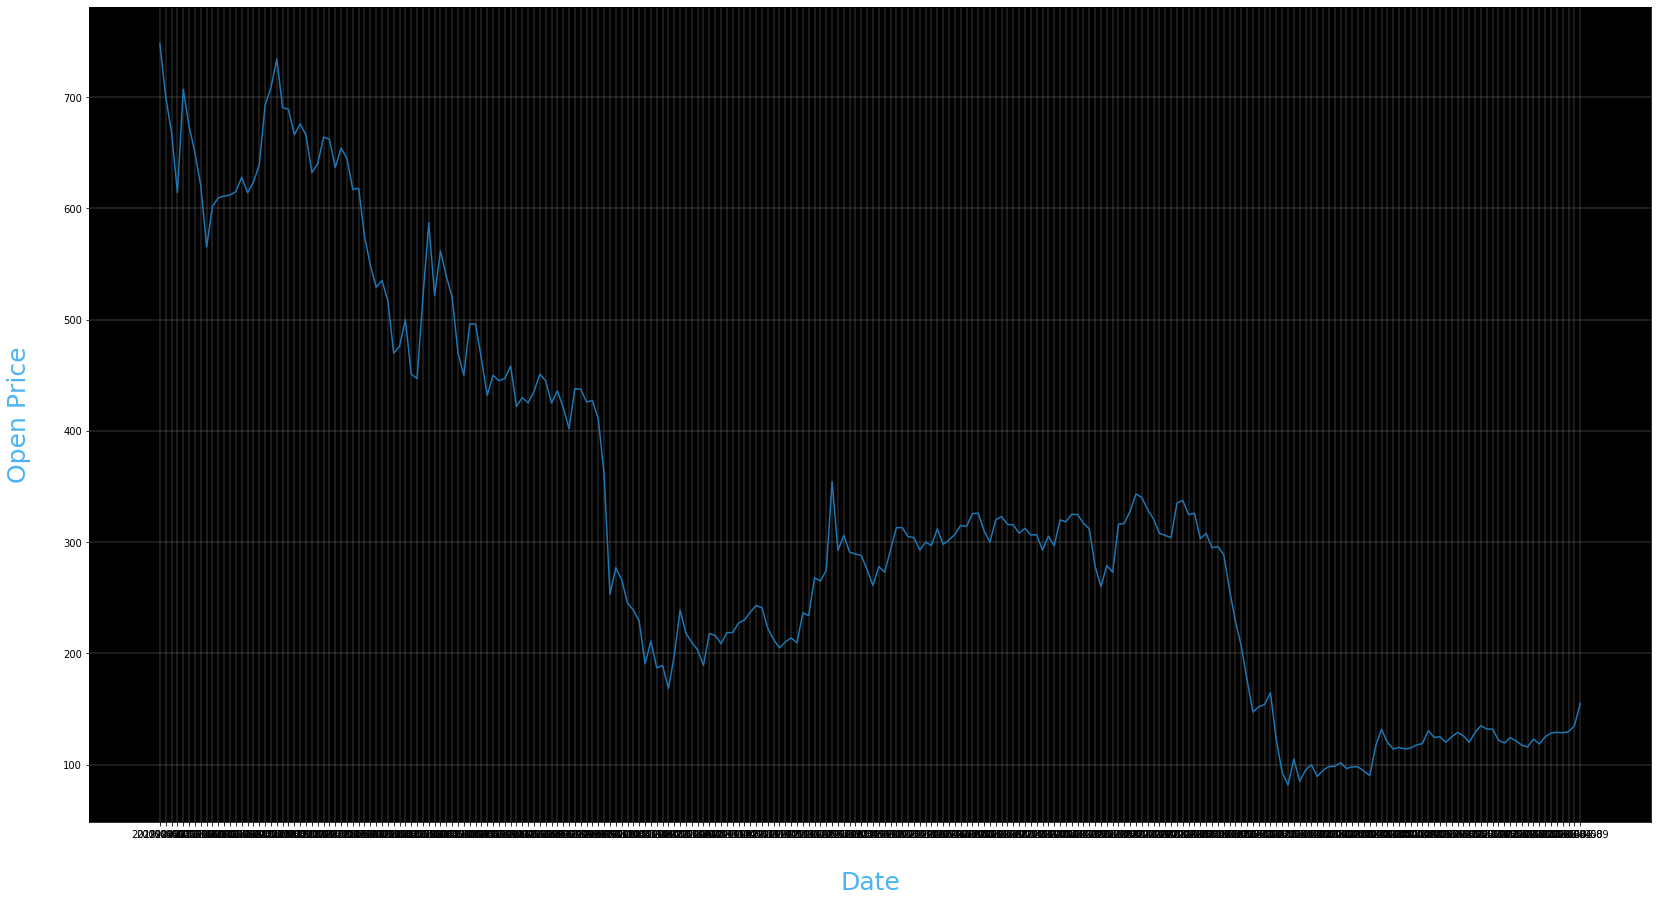

In [6]:
plt.figure(figsize=(28,15))
ax = plt.axes() 
ax.grid(linewidth=0.4, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_xlabel('\nDate',size=25,color='#4bb4f2') 
ax.set_ylabel('Open Price\n', 
              size=25,color='#4bb4f2') 
  
ax.plot(df['Date'], df['Open'])

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,325.811475,338.352255,311.746107,323.591394,310.601518,3.384978e+07
std,178.223416,182.185857,172.236681,177.069413,163.318215,2.420768e+07
min,81.750000,92.849998,81.000000,89.750000,89.750000,7.365637e+06
25%,189.212502,205.799995,180.137505,193.787506,184.028759,1.816179e+07
50%,300.975006,309.149994,292.125000,299.699997,294.873901,2.614649e+07
75%,445.000000,457.262512,431.062500,444.612503,417.614769,4.244775e+07
max,748.000000,755.000000,723.500000,733.349976,686.304016,1.734092e+08


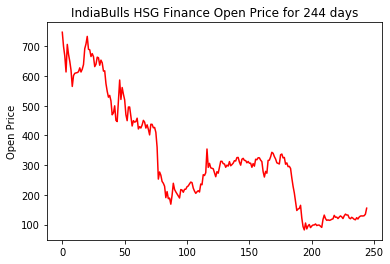

In [8]:
plt.plot(df.index, df['Open'], 'r')
plt.title('IndiaBulls HSG Finance Open Price for 244 days')
plt.ylabel('Open Price');
plt.show()

In [9]:
open_data = df[['Date','Open']]
open_data.shape

(244, 2)

In [10]:
open_data.head()

,Date,Open
0,2019-06-10,748.000000
1,2019-06-11,700.000000
2,2019-06-12,668.000000
3,2019-06-13,614.099976
4,2019-06-14,707.000000


In [11]:
open_data.isnull().sum()

Date    0
Open    0
dtype: int64

In [12]:
open_data = open_data.groupby('Date')['Open'].sum().reset_index()

In [13]:
open_data

,Date,Open
0,2019-06-10,748.000000
1,2019-06-11,700.000000
2,2019-06-12,668.000000
3,2019-06-13,614.099976
4,2019-06-14,707.000000
...,...,...
239,2020-06-03,129.000000
240,2020-06-04,128.649994
241,2020-06-05,129.699997
242,2020-06-08,134.800003


In [14]:
open_data = open_data.set_index('Date')
open_data.index

Index(['2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
       '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
       ...
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
       '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09'],
      dtype='object', name='Date', length=244)

In [15]:
open_data.index = pd.to_datetime(open_data.index)
open_data.index

DatetimeIndex(['2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19',
               '2019-06-20', '2019-06-21',
               ...
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01',
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-08', '2020-06-09'],
              dtype='datetime64[ns]', name='Date', length=244, freq=None)

In [16]:
y = open_data['Open']

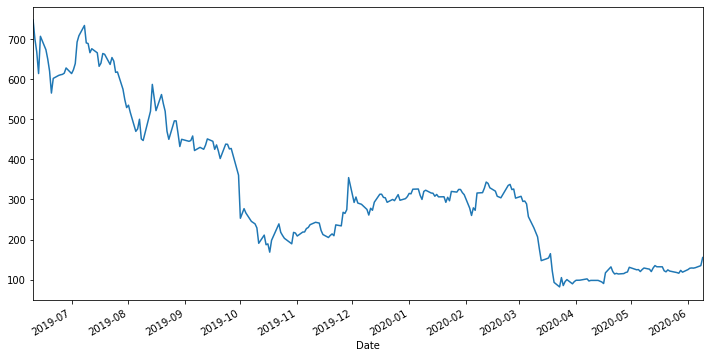

In [17]:
y.plot(figsize=(12,6))

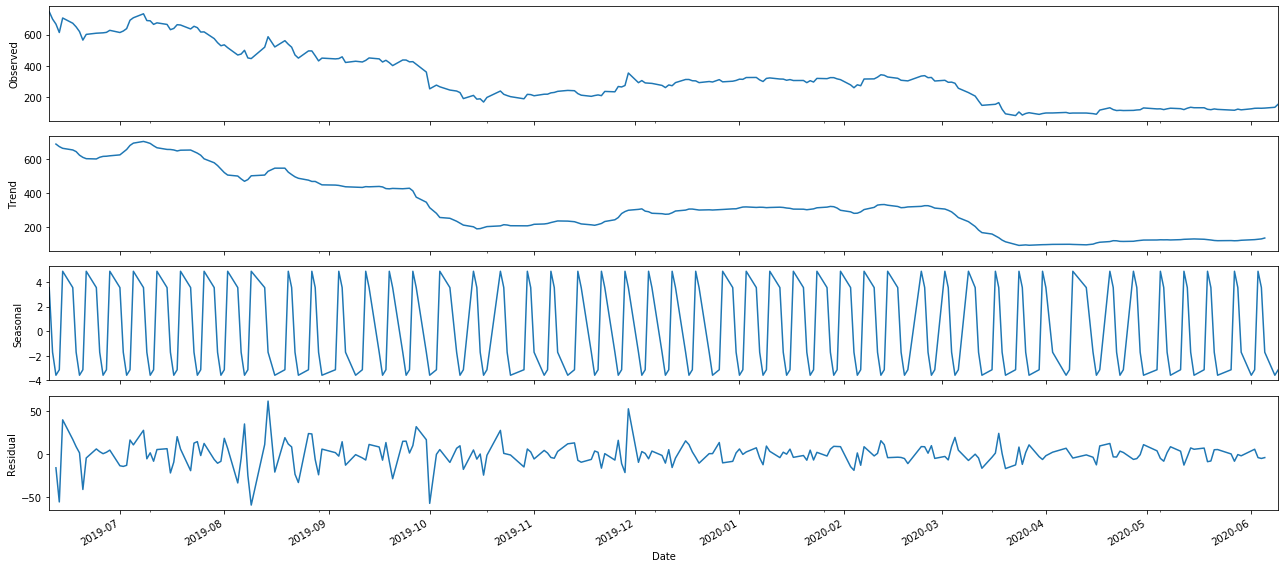

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=5)
fig = decomposition.plot()
plt.show()

In [19]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3564.055017232352
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3127.4361768457047
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2679.6853961617467
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2540.752216490994
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2642.4630183891477
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2632.1282811478954
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2552.0060257908026
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2542.4338250262426
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3239.2310830518945
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2829.730945479787
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2454.698247481389
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2324.2248058556147
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2434.6578923820407
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2409.958457681091
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2345.6717881805735
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2318.252686078093
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2199.94148931596
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2065.348451718465
A

In [20]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9644      0.031    -31.262      0.000      -1.025      -0.904
ma.L1          1.0000    143.309      0.007      0.994    -279.880     281.880
ar.S.L12       0.0266      0.009      2.848      0.004       0.008       0.045
ma.S.L12      -1.0000    547.311     -0.002      0.999   -1073.710    1071.710
sigma2       435.1040   2.43e+05      0.002      0.999   -4.76e+05    4.77e+05


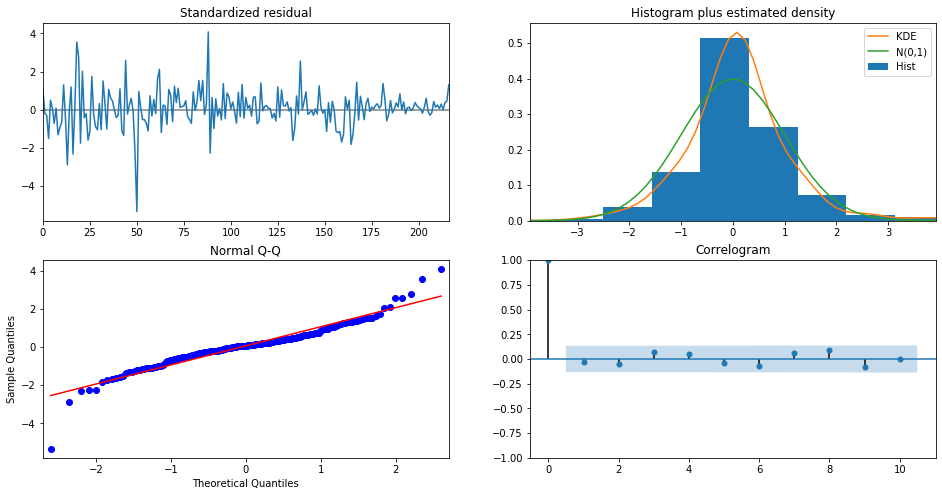

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

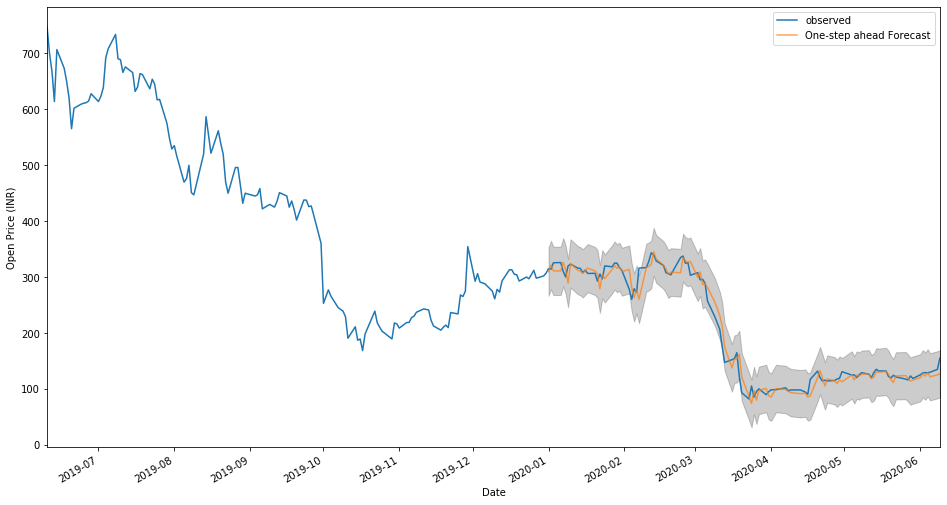

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 9))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Open Price (INR)')
plt.legend()
plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error (MSE) of our forecasts is 214.43
The Root Mean Squared Error (RMSE) of our forecasts is 14.64


In [24]:
pred_uc = results.get_forecast(steps=150)
pred_ci = pred_uc.conf_int()

In [25]:
pred_ci

,lower Open,upper Open
244,112.576981,196.937423
245,95.361723,216.022042
246,84.418942,231.675843
247,70.462054,241.096268
248,54.063539,244.464221
...,...,...
389,-820.124116,487.574247
390,-821.589830,492.398493
391,-826.506268,493.776947
392,-836.920442,489.594320


In [26]:
Open_output = pd.DataFrame(pred_ci)
Open_output.head()

,lower Open,upper Open
244,112.576981,196.937423
245,95.361723,216.022042
246,84.418942,231.675843
247,70.462054,241.096268
248,54.063539,244.464221


In [27]:
Open_output['mean_value']=Open_output.mean(axis=1)

In [28]:
Open_output

,lower Open,upper Open,mean_value
244,112.576981,196.937423,154.757202
245,95.361723,216.022042,155.691883
246,84.418942,231.675843,158.047392
247,70.462054,241.096268,155.779161
248,54.063539,244.464221,149.263880
...,...,...,...
389,-820.124116,487.574247,-166.274934
390,-821.589830,492.398493,-164.595668
391,-826.506268,493.776947,-166.364661
392,-836.920442,489.594320,-173.663061


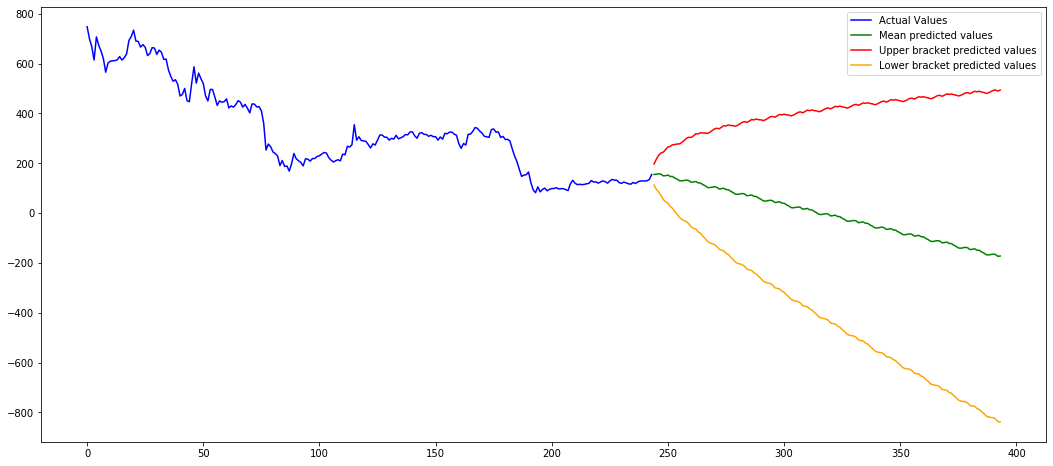

In [29]:
plt.plot(y.values,'blue' , label='Actual Values')
plt.plot(Open_output['mean_value'],'green', label='Mean predicted values')
plt.plot(Open_output['upper Open'],'red', label = 'Upper bracket predicted values')
plt.plot(Open_output['lower Open'],'orange', label = 'Lower bracket predicted values')
plt.legend(loc='best')
plt.show()